In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The objective is to conduct a comprehensive data analysis, aimed at determining the predictive strength of the features in relation to the independent variable. The pivotal question to be answered is: Do the features possess sufficient predictive power to accurately forecast the independent variable?

In [3]:
# Load data
df = pd.read_csv('ds_salaries.csv')

Dataset Summary

In [4]:
# Display the first 5 rows of the dataframe
print(df.head())

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
df.info()
# Check the data types of each column
#print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_resid

In [7]:
# Get the summary statistics of the numerical columns
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


Target Variable Analysis

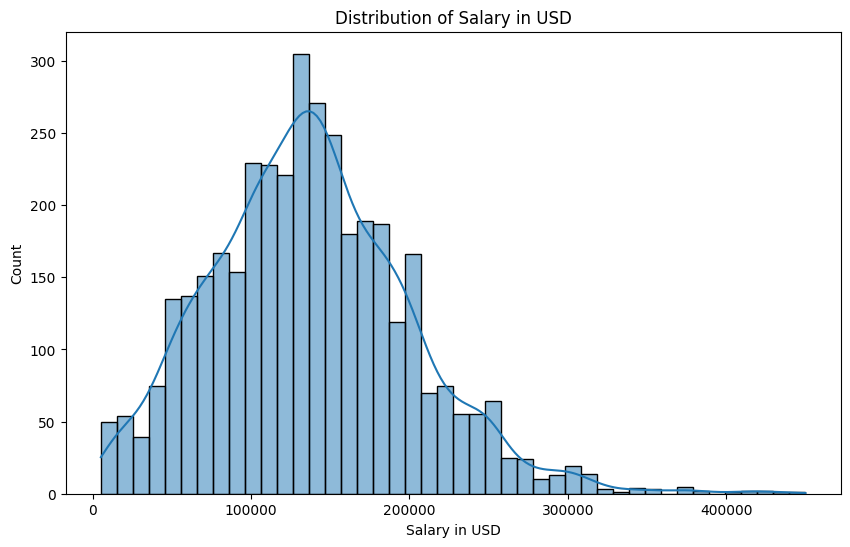

In [ ]:
target_variable = 'salary_in_usd'

# Distribution plot - Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=target_variable, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

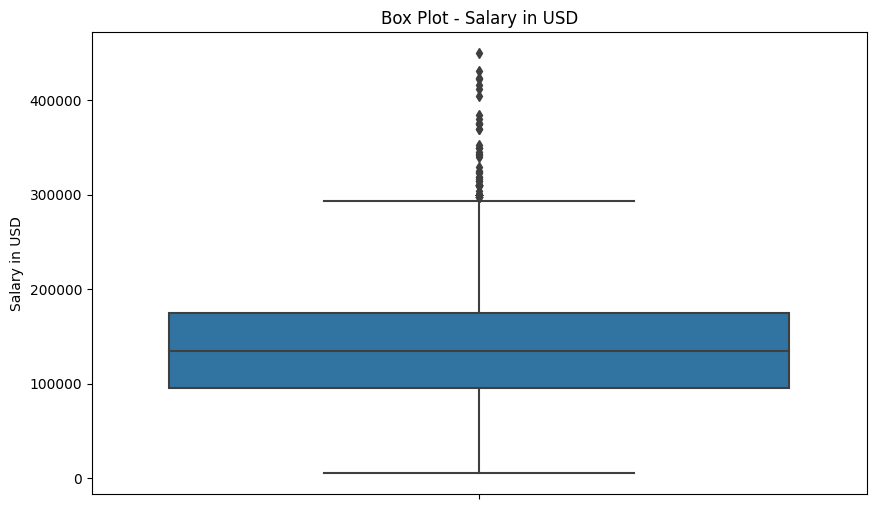

In [ ]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y=target_variable)
plt.title('Box Plot - Salary in USD')
plt.ylabel('Salary in USD')
plt.show()

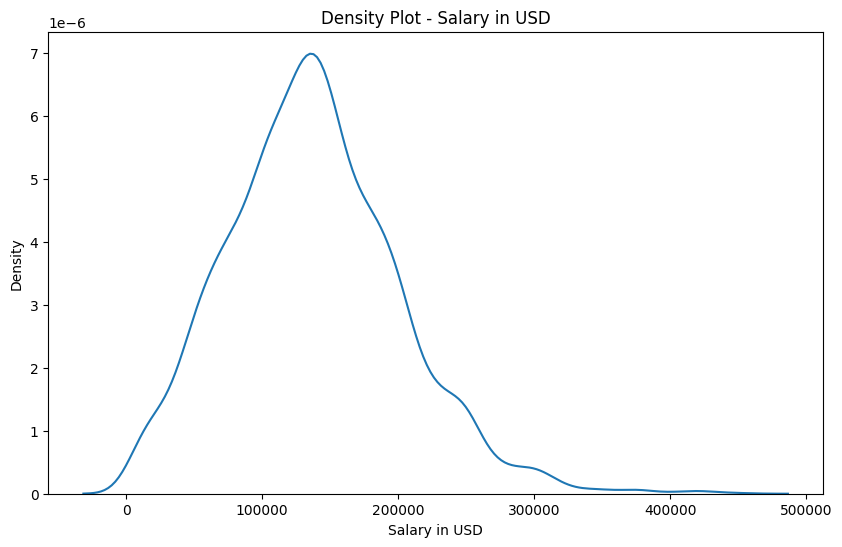

In [ ]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x=target_variable)
plt.title('Density Plot - Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.show()

Feature Analysis

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Plot histograms of numerical columns to understand distribution
features = ['work_year','experience_level', 'employment_type', 'job_title','employee_residence',
       'remote_ratio', 'company_location', 'company_size']

Variable 'salary_in_usd' is our target variable. We drop variables 'salary' and 'salary_currency' form our feature variables as they are correlated with the target variable.
All the features are categorical which might result in a sparse matrix. Note: appropriate encoding techniques such as one-hot encoding or label encoding should be applied in data preprocessing step.

In [ ]:
# Loop through each feature
for feature in features:
    unique_values = df[feature].unique()
    data_type = df[feature].dtype
    print(f"Feature: {feature}")
    print(f"Data Type: {data_type}")
    print(f"Unique Values: {unique_values}")
    print("------------------------")

Feature: work_year
Data Type: int64
Unique Values: [2023 2022 2020 2021]
------------------------
Feature: experience_level
Data Type: object
Unique Values: ['SE' 'MI' 'EN' 'EX']
------------------------
Feature: employment_type
Data Type: object
Unique Values: ['FT' 'CT' 'FL' 'PT']
------------------------
Feature: job_title
Data Type: object
Unique Values: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Bi

The folloing variables will need especial preprocessing work.

Feature: experience_level
Data Type: object
Unique Values: ['SE' 'MI' 'EN' 'EX']

Feature: work_year
Data Type: int64
Unique Values: [2023 2022 2020 2021]

Feature: remote_ratio
Data Type: int64
Unique Values: [100   0  50]

Feature: company_size
Data Type: object
Unique Values: ['L' 'S' 'M']

1. The 'experience_level' feature seems to have an inherent order with categories 'SE' (Software Engineer), 'MI' (Mid-level), 'EN' (Engineer), and 'EX' (Executive). This feature can be a good candidate for ordinal encoding as there is likely a progression from lower to higher levels of experience.

2. The variables 'remote_ratio' and 'work_year' are essentially categorical variables, even though they are represented as integers, it can be beneficial to convert them to string (object) data type for preprocessing when working with a machine learning model. You might ask why? I found the folliwng reason from the web:
"
1. Preserving Categorical Nature: By converting these variables to string, you explicitly indicate that they represent categorical information, maintaining the categorical nature of the features. This can help prevent the model from interpreting them as numerical values and assuming any ordinal relationships.

2. Consistent Encoding: Converting both 'remote_ratio' and 'work_year' to string data type ensures consistency in the encoding of all categorical variables in your dataset. Treating them consistently as categorical features allows you to apply the same preprocessing techniques and encoding strategies across the dataset.

3. Avoiding Unintended Numerical Relationships: Keeping these variables as integers might lead the model to interpret them as numerical values, potentially assuming relationships that do not exist. For example, treating 'remote_ratio' as a numerical variable might imply an inherent order, which might not be valid in this case."


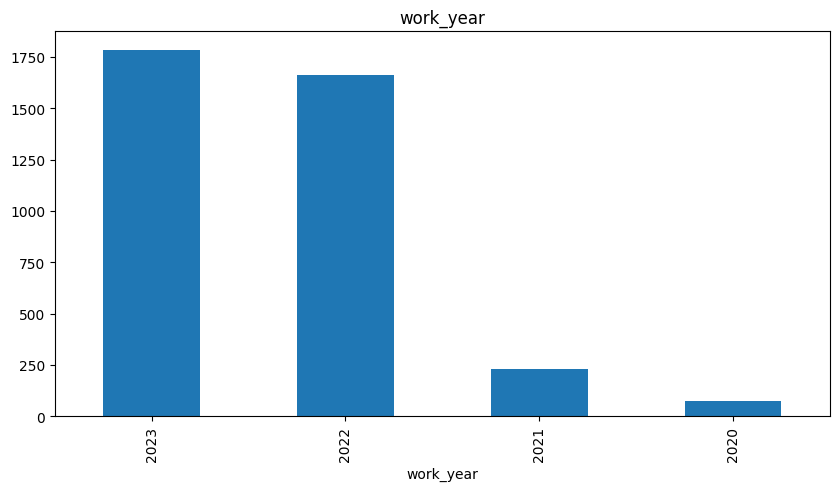

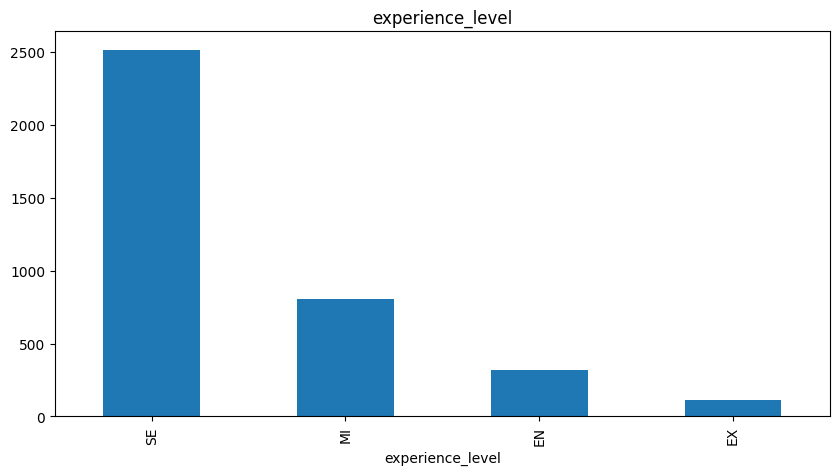

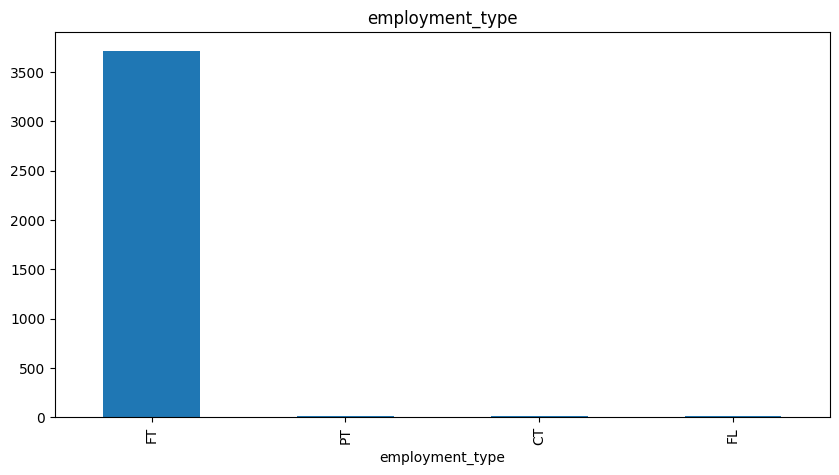

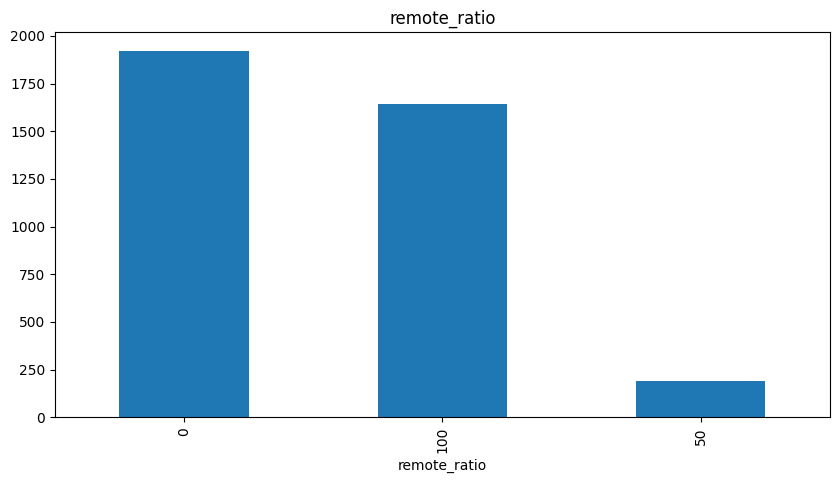

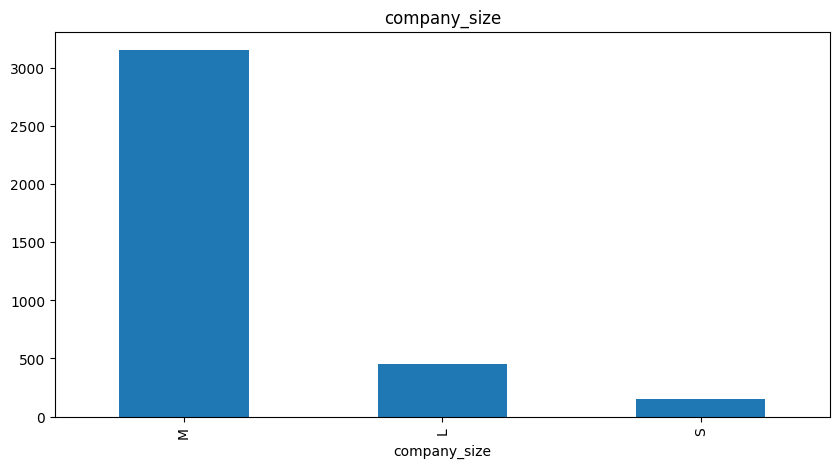

In [35]:
# Plot bar charts of categorical columns to understand distribution
features_to_plot = ['work_year','experience_level', 'employment_type', 'remote_ratio', 'company_size']
for feature in features_to_plot:
    plt.figure(figsize=(10,5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()

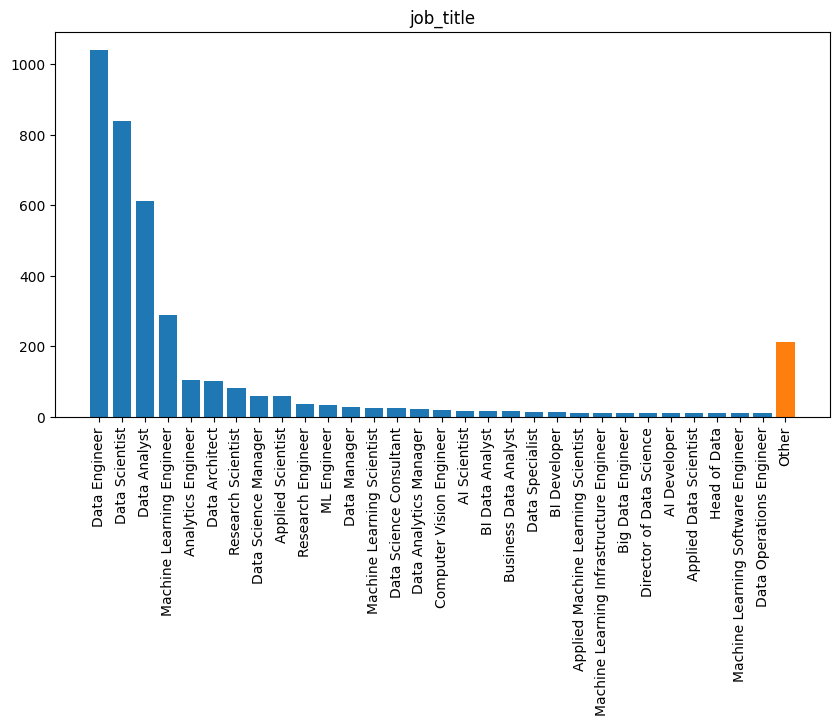

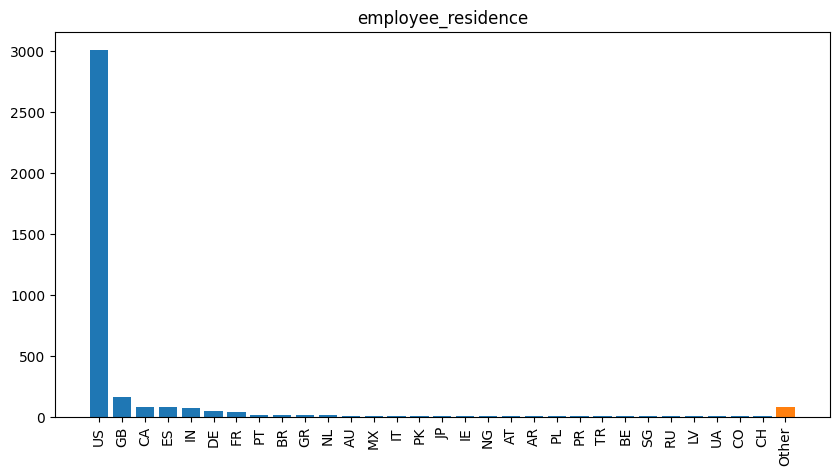

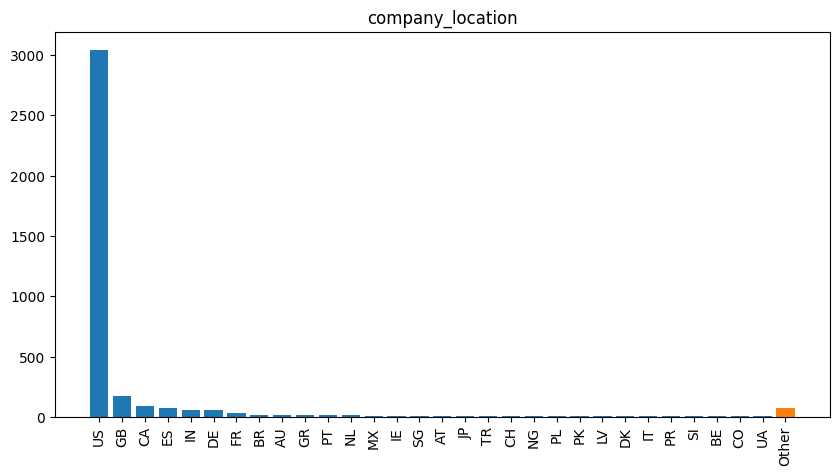

In [36]:
features_to_plot2 = ['job_title', 'employee_residence', 'company_location']

for feature in features_to_plot2:
    plt.figure(figsize=(10, 5))
    
    value_counts = df[feature].value_counts()
    top_30_values = value_counts.head(30)
    remaining_count = value_counts[30:].sum()
    
    plt.bar(top_30_values.index, top_30_values)
    plt.bar("Other", remaining_count)
    
    plt.title(feature)
    plt.xticks(rotation='vertical')
    plt.show()


In [38]:
# Check for missing values
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


The dataset has no missing value. 
Note: We should consider outliers in preprocessing step. 